# Stage 07 - Outlier Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('../data/processed/VIX_S&P500_clean.csv')
df.head()

,date,vix_close,vix_high,vix_low,vix_open,sp500_close,sp500_high,sp500_low,sp500_open,sp500_volume
0,2019-08-28,19.350000,21.639999,19.10,20.549999,2887.939941,2890.030029,2853.050049,2861.280029,3102480000
1,2019-08-29,17.879999,19.200001,17.60,19.020000,2924.580078,2930.500000,2905.669922,2910.370117,3177150000
2,2019-08-30,18.980000,19.180000,17.09,17.940001,2926.459961,2940.429932,2913.320068,2937.090088,3009910000
3,2019-09-03,19.660000,21.150000,19.41,20.959999,2906.270020,2914.389893,2891.850098,2909.010010,3427830000
4,2019-09-04,17.330000,18.830000,17.26,18.230000,2937.780029,2938.840088,2921.860107,2924.669922,3167900000


In [7]:
import sys
sys.path.append(os.path.abspath('..'))
from src import outliers

In [8]:
def detect_outliers_iqr(series: pd.Series, k: float = 1.5) -> pd.Series:
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return (series < lower) | (series > upper)

def detect_outliers_zscore(series: pd.Series, threshold: float = 3.0) -> pd.Series:
    mu = series.mean()
    sigma = series.std(ddof = 0)
    z = (series - mu) / (sigma if sigma != 0 else 1.0)
    return z.abs() > threshold

def winsorize_series(series: pd.Series, lower: float = 0.05, upper: float = 0.95) -> pd.Series:
    lo = series.quantile(lower)
    hi = series.quantile(upper)
    return series.clip(lower = lo, upper = hi)

In [10]:
# Detect outliers and create flags

target_col = 'sp500_volume'
df['outlier_iqr'] = detect_outliers_iqr(df[target_col])
df['outlier_z'] = detect_outliers_zscore(df[target_col], threshold = 3.0)
df[['outlier_iqr', 'outlier_z']].mean()

outlier_iqr    0.062997
outlier_z      0.023873
dtype: float64

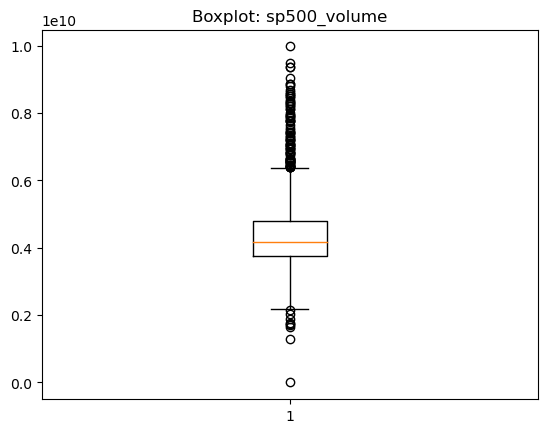

In [11]:
# Visual check - Boxplot

plt.figure()
plt.boxplot(df[target_col])
plt.title(f'Boxplot: {target_col}')
plt.show()

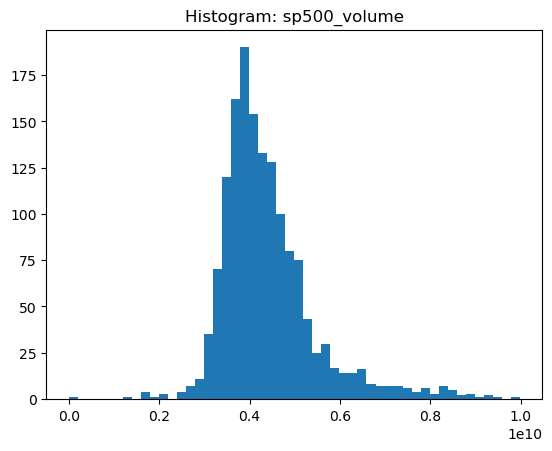

In [14]:
# Visual check - Histogram

plt.figure()
plt.hist(df[target_col], bins = 50)
plt.title(f'Histogram: {target_col}')
plt.show()

The explanation of outlier assumptions and potential risks to results is added to `README.md` under Stage 07. 